# Cities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.basemap import Basemap as Basemap

Selected U.S. cities:


|City | Latitude | Longitude |
| --- | --- | --- |
| New York | 40.670	| -73.940 |
| Los Angeles | 	34.110 | -118.410 |
| Chicago | 41.840 | -87.680 |
| Houston | 29.770 | -95.390 |
| Philadelphia | 40.010 | -75.130 |
| Detroit | 42.380 | -83.100 |
| Seattle |	47.620 | -122.350 |
| Denver | 	39.770 | -104.870 |
| Las vegas | 36.210 | -115.220 |
| Oklahoma city | 35.470 | -97.510 |

I'm considering every location within 6.2  in a certain city.

In [2]:
city_samples_100_samples = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/city_samples_100.csv')

In [3]:
cities = {'cities': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Philadelphia', 'Detroit', 'Seattle',
                     'Denver', 'Las vegas', 'Oklahoma city'],
          'Latitude': [40.670, 34.11, 41.840, 29.770, 40.010, 42.380, 47.620, 39.770, 36.210, 35.470],
         'Longitude': [-73.940,-118.41,-87.680,-95.390,-75.130, -83.100, -122.350, -104.870, -115.220, -97.510]}
cities_df = pd.DataFrame(cities)

## Plotting the cities 

In [54]:
G = nx.from_pandas_edgelist(cities_df, source='cities', target='cities')

In [55]:
# Set up base map
plt.figure(figsize=(50,100))
m = Basemap(projection='merc', llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=55, lat_ts=0, resolution='l',suppress_ticks=True)

<Figure size 5000x10000 with 0 Axes>

In [56]:
# import long lat as m attribute
mx, my = m(cities_df['Longitude'].values, cities_df['Latitude'].values)

pos = {}

for count, elem in enumerate (cities_df['cities']):

    pos[elem] = (mx[count], my[count])

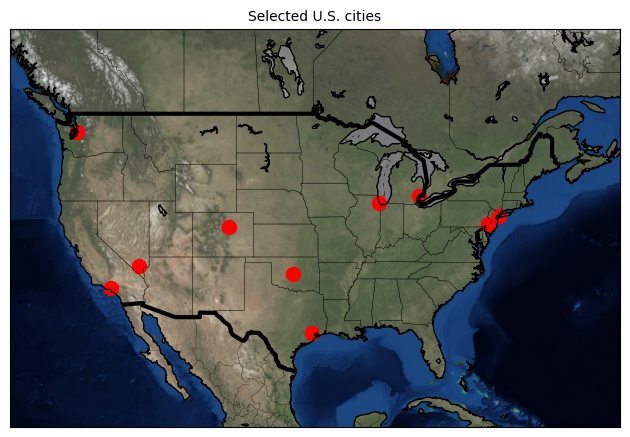

In [60]:
# draw nodes and edges and overly on basemap
nx.draw_networkx_nodes(G = G, pos = pos, nodelist = G.nodes(), node_color = 'r', alpha = 1, node_size= 100)

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
m.fillcontinents(alpha = 0.3)

plt.title("Selected U.S. cities", fontsize = 10)
m.bluemarble()
plt.tight_layout()
plt.savefig("selected_cities.png", format = "png", dpi = 300)
plt.show()

## Number of steps for the city pairs

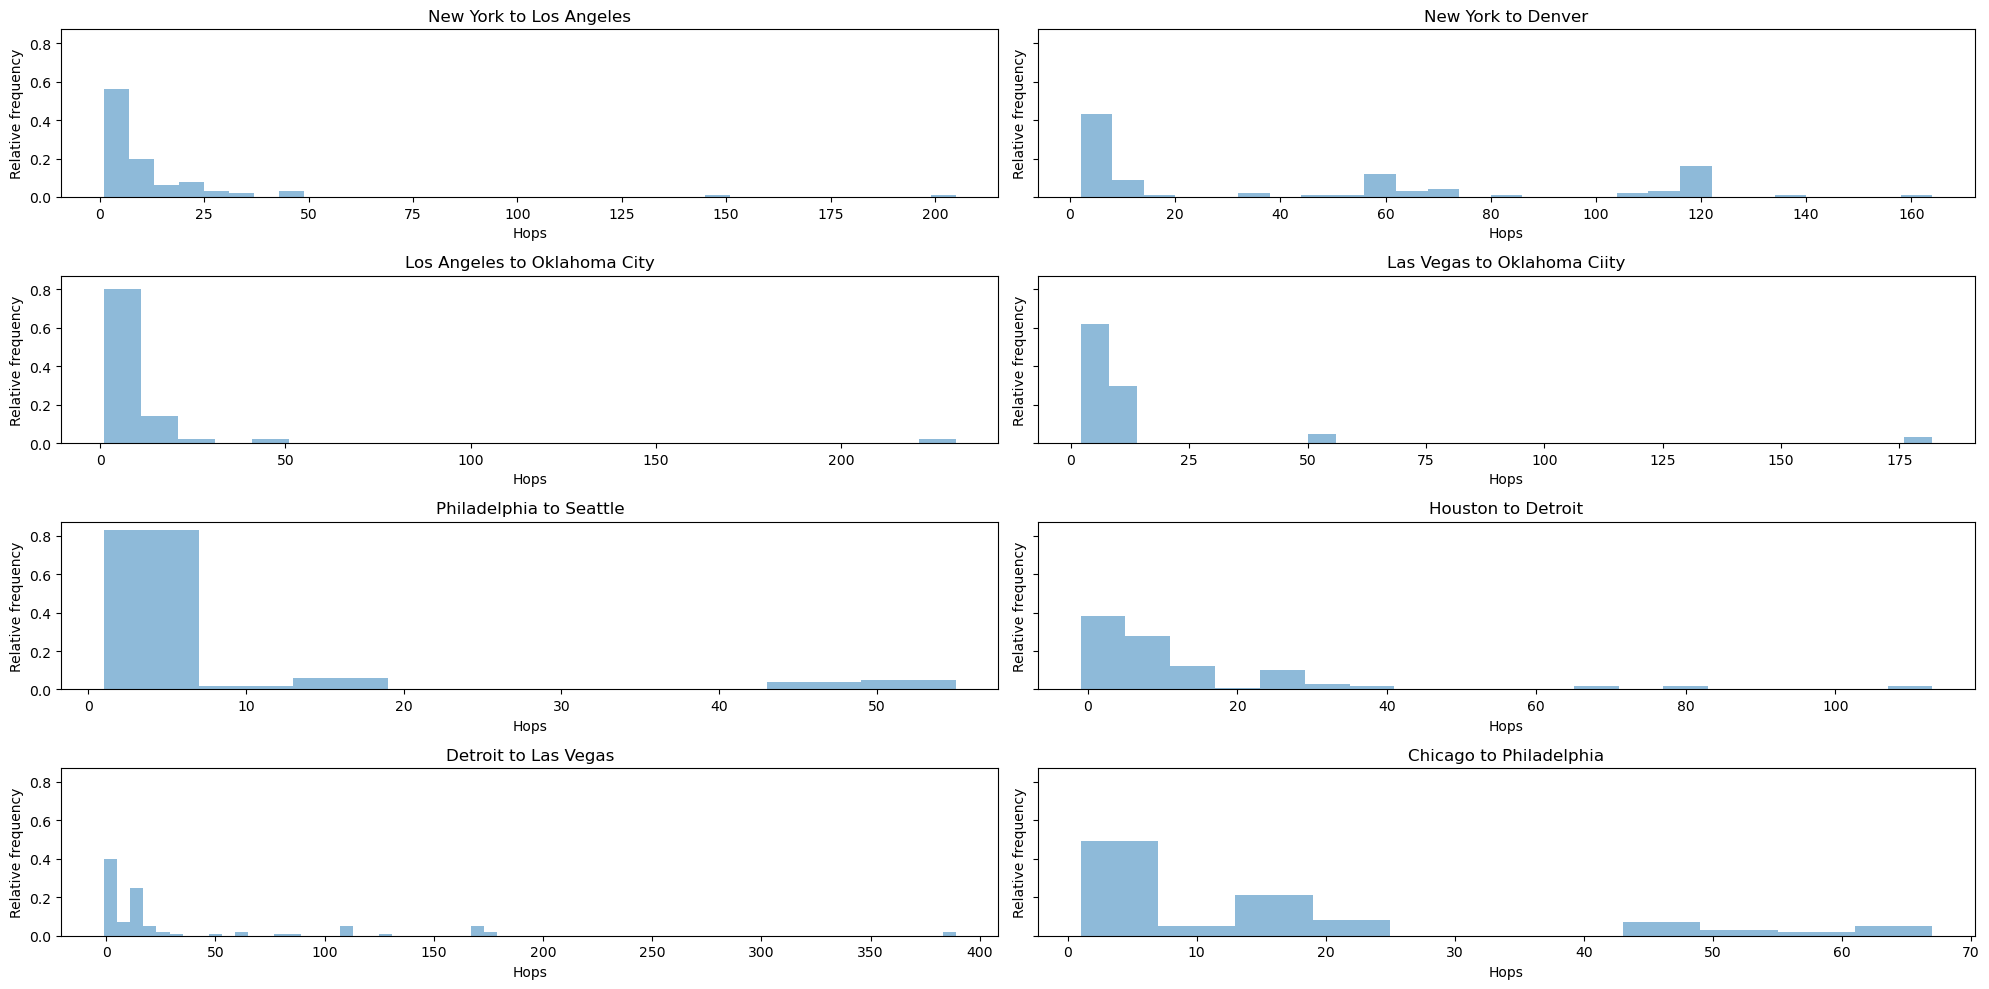

In [17]:
fig, axs = plt.subplots(4, 2, sharey=True, tight_layout=True, figsize=(20,10))

# We can set the number of bins with the *bins* keyword argument.
data = city_samples_100_samples[(city_samples_100_samples['from']=='New York' )& (city_samples_100_samples['to']=='Los Angeles')].iloc[:,3]
w = 6
axs[0,0].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
axs[0,0].set_xlabel('Hops')
axs[0,0].set_ylabel('Relative frequency')
axs[0,0].set_title('New York to Los Angeles')
data = city_samples_100_samples[(city_samples_100_samples['from']=='New York' )& (city_samples_100_samples['to']=='Denver')].iloc[:,3]
w = 6
axs[0,1].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
axs[0,1].set_xlabel('Hops')
axs[0,1].set_ylabel('Relative frequency')
axs[0,1].set_title('New York to Denver')
data = city_samples_100_samples[(city_samples_100_samples['from']=='Los Angeles' )& (city_samples_100_samples['to']=='Oklahoma city')].iloc[:,3]
w = 10
axs[1,0].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
axs[1,0].set_xlabel('Hops')
axs[1,0].set_ylabel('Relative frequency')
axs[1,0].set_title('Los Angeles to Oklahoma City')
data = city_samples_100_samples[(city_samples_100_samples['from']=='Las vegas' )& (city_samples_100_samples['to']=='Oklahoma city')].iloc[:,3]
w = 6
axs[1,1].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
axs[1,1].set_xlabel('Hops')
axs[1,1].set_ylabel('Relative frequency')
axs[1,1].set_title('Las Vegas to Oklahoma Ciity')
data = city_samples_100_samples[(city_samples_100_samples['from']=='Philadelphia' )& (city_samples_100_samples['to']=='Seattle')].iloc[:,3]
w = 6
axs[2,0].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
axs[2,0].set_xlabel('Hops')
axs[2,0].set_ylabel('Relative frequency')
axs[2,0].set_title('Philadelphia to Seattle')
data = city_samples_100_samples[(city_samples_100_samples['from']=='Houston' )& (city_samples_100_samples['to']=='Detroit')].iloc[:,3]
w = 6
axs[2,1].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
axs[2,1].set_xlabel('Hops')
axs[2,1].set_ylabel('Relative frequency')
axs[2,1].set_title('Houston to Detroit')
data = city_samples_100_samples[(city_samples_100_samples['from']=='Detroit' )& (city_samples_100_samples['to']=='Las vegas')].iloc[:,3]
w = 6
axs[3,0].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
axs[3,0].set_xlabel('Hops')
axs[3,0].set_ylabel('Relative frequency')
axs[3,0].set_title('Detroit to Las Vegas')
data = city_samples_100_samples[(city_samples_100_samples['from']=='Chicago' )& (city_samples_100_samples['to']=='Philadelphia')].iloc[:,3]
w = 6
axs[3,1].set_xlabel('Hops')
axs[3,1].set_ylabel('Relative frequency')
axs[3,1].set_title('Chicago to Philadelphia')
axs[3,1].hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.tight_layout()
plt.savefig('cities.png')
plt.show()

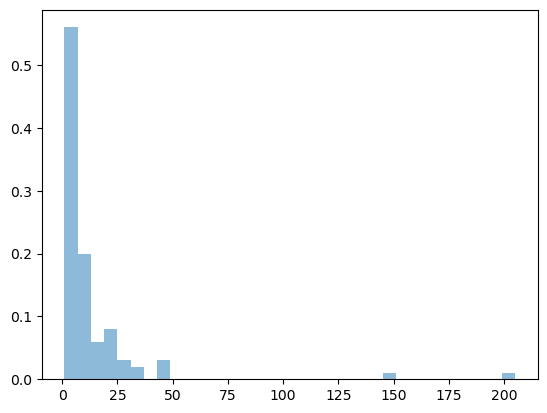

In [16]:
data = city_samples_100_samples[(city_samples_100_samples['from']=='New York' )& (city_samples_100_samples['to']=='Los Angeles')].iloc[:,3]
w = 6
plt.hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.show()

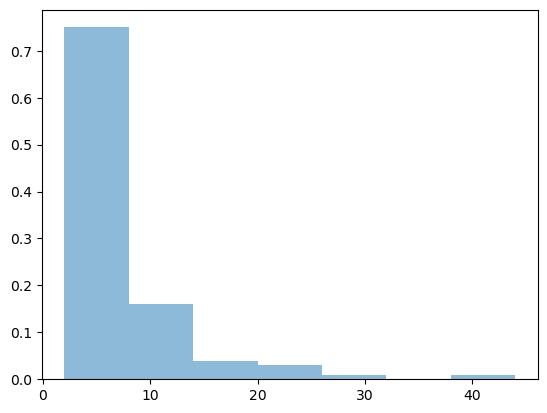

In [90]:
data = city_samples_100_samples[(city_samples_100_samples['from']=='New York' )& (city_samples_100_samples['to']=='Oklahoma city')].iloc[:,3]
w = 6
plt.hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.show()

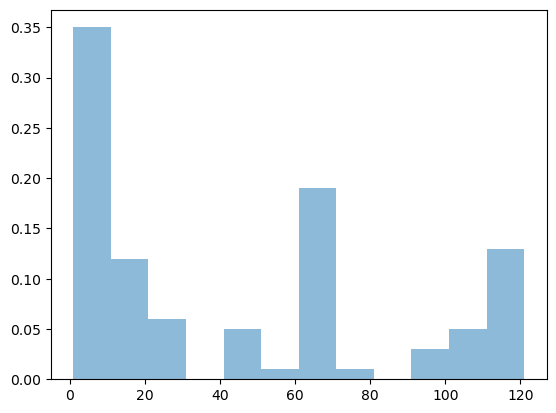

In [88]:
data = city_samples_100_samples[(city_samples_100_samples['from']=='Los Angeles' )& (city_samples_100_samples['to']=='Denver')].iloc[:,3]
w = 10
plt.hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.show()

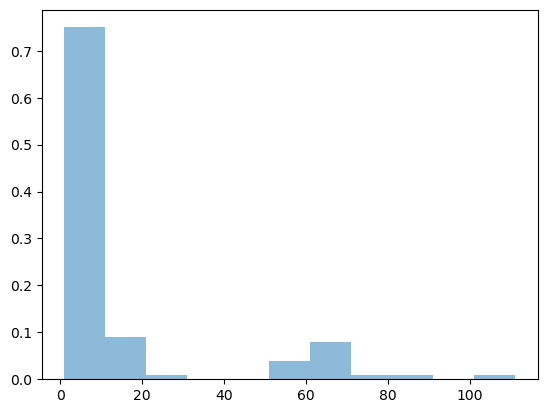

In [91]:
data = city_samples_100_samples[(city_samples_100_samples['from']=='New York' )& (city_samples_100_samples['to']=='Chicago')].iloc[:,3]
w = 10
plt.hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.show()

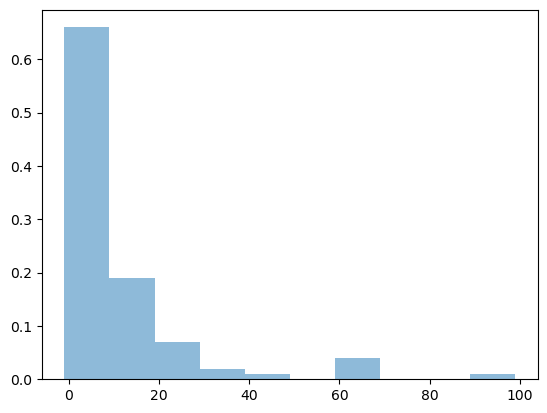

In [92]:
data = city_samples_100_samples[(city_samples_100_samples['from']=='Los Angeles' )& (city_samples_100_samples['to']=='Chicago')].iloc[:,3]
w = 10
plt.hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.show()

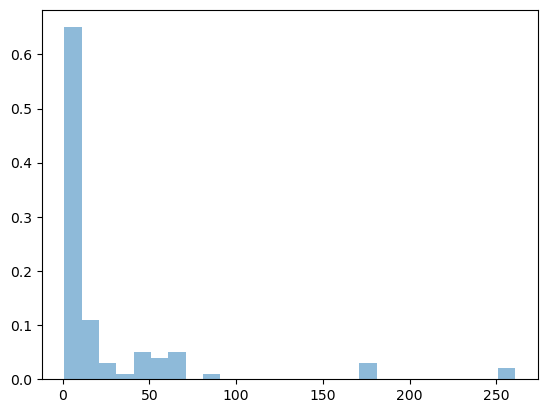

In [94]:
data = city_samples_100_samples[(city_samples_100_samples['from']=='Chicago' )& (city_samples_100_samples['to']=='Las vegas')].iloc[:,3]
w = 10
plt.hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.show()

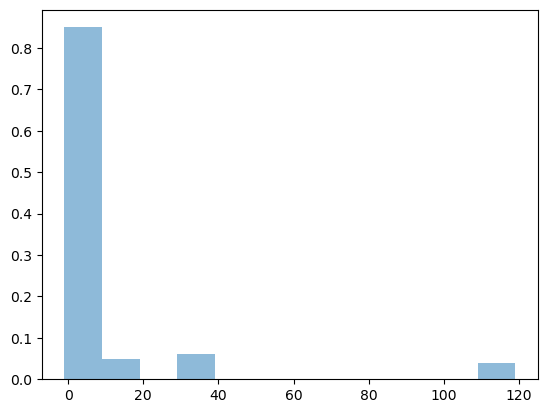

In [95]:
data = city_samples_100_samples[(city_samples_100_samples['from']=='Detroit' )& (city_samples_100_samples['to']=='Seattle')].iloc[:,3]
w = 10
plt.hist( data, alpha=0.5, weights=np.ones_like(data) / len(data), bins=np.arange(min(data), max(data) + w, w))
plt.show()